In [1]:
import sys
sys.path.append('../')

from main.data_mod import AlcoholDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer

#https://kprototypes.readthedocs.io/en/latest/api.html


In [29]:

# Testing clustering with only frequency 'Every day'
alc_edu_freq = AlcoholDataset(dataset_name='hlth_ehis_al1e', dataset_group='education', frequences= ['Every day']).get_dataset()
alc_edu_freq_data = alc_edu_freq[alc_edu_freq['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)


1. Testing with only one frequency value

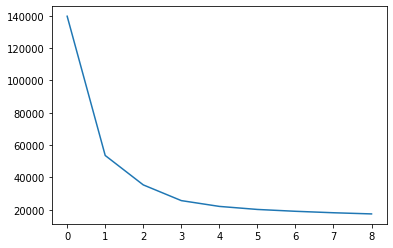

In [3]:
# Test optimal number of cluster with elbow method

cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(alc_edu_freq_data, categorical=[0,1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)


In [4]:
print(cost)

[139705.19724571536, 53579.57280995628, 35391.55322867352, 25668.639499937362, 22083.38438221134, 20202.827459616074, 19063.87452644401, 18157.457086242448, 17438.239634066143]


In [15]:
# Testing with optimal number of clusters

kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(alc_edu_freq_data, categorical=[0,1,2,3])

cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

alc_edu_freq_with_clusters = alc_edu_freq_data.copy()
alc_edu_freq_with_clusters['clusters'] = cluster_dict

NameError: name 'alc_edu_freq_data' is not defined

In [6]:
alc_edu_freq_data_clust_0 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 0 ]
alc_edu_freq_data_clust_1 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 1 ]
alc_edu_freq_data_clust_2 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 2 ]

2. Test with feature reduction applied to frequencies

In [2]:
alc_edu_freq_red = AlcoholDataset(dataset_name='hlth_ehis_al1e',
                                           dataset_group='education',
                                           frequency_reduction=True
                                           ).get_dataset()
alc_edu_freq_red_data = alc_edu_freq_red[alc_edu_freq_red['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)


# Preprocessing
# https://antonsruberts.github.io/kproto-audience/

for c in alc_edu_freq_red_data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    alc_edu_freq_red_data[c] =  pt.fit_transform(np.array(alc_edu_freq_red_data[c]).reshape(-1, 1))

/home/ncnella/Matikka/Introduction to data science/mini-project/datascience-miniproject/sandbox/../main/data_mod.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.filtered_data['frequenc'] = self.filtered_data['frequenc'].replace({


In [5]:
alc_edu_freq_red_data.to_csv('../data/datasets_clean/freq_education_cleaned.csv')

In [6]:
# Test optimal number of cluster with elbow method

costs = []
for num_clusters in list(range(1,16)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(alc_edu_freq_red_data, categorical=[0,1,2,3])
    costs.append(kproto.cost_)

plt.plot(costs)

from kneed import KneeLocator

cost_elbow = KneeLocator(x=range(1,16), y=costs, direction='decreasing')

print(cost_elbow)

KeyboardInterrupt: 

In [10]:
print(cost_elbow.elbow)

15


In [17]:
print(cost)

[5284.999999999996, 3834.591731575818, 3065.7646993638955, 2459.7673785862157, 2252.2783536087322, 2056.510478635786, 1902.2590720708156, 1819.8384020338044, 1770.1975718725896]


In [9]:
# Testing with optimal number of clusters

kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(alc_edu_freq_red_data, categorical=[0,1,2,3])

cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

alc_edu_freq_red_clusters = alc_edu_freq_red_data.copy()
alc_edu_freq_red_clusters['clusters'] = cluster_dict

alc_edu_freq_red_clusters.to_csv('../data/clusters/freq_education_clusters.csv')

In [8]:
alc_edu_freq_red_clusters_0 = alc_edu_freq_red_clusters[alc_edu_freq_red_clusters['clusters'] == 0 ]
alc_edu_freq_red_clusters_1 = alc_edu_freq_red_clusters[alc_edu_freq_red_clusters['clusters'] == 1 ]
alc_edu_freq_red_clusters_2 = alc_edu_freq_red_clusters[alc_edu_freq_red_clusters['clusters'] == 2 ]

2. Test with feature reduction applied to frequencies and different age group

In [12]:
new_age_group = ['From 18 to 44 years','From 45 to 64 years','65 years or over']

alc_edu_freq_red_ages = AlcoholDataset(dataset_name='hlth_ehis_al1e',
                                           dataset_group='education',
                                           feature_reduction=True,
                                           ages=new_age_group
                                           ).get_dataset()

alc_edu_freq_red_ages = alc_edu_freq_red_ages[alc_edu_freq_red_ages['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)

for c in alc_edu_freq_red_ages.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    alc_edu_freq_red_ages[c] =  pt.fit_transform(np.array(alc_edu_freq_red_ages[c]).reshape(-1, 1))

/home/ncnella/Matikka/Introduction to data science/mini-project/datascience-miniproject/data/data_mod.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.filtered_data['frequenc'].replace({


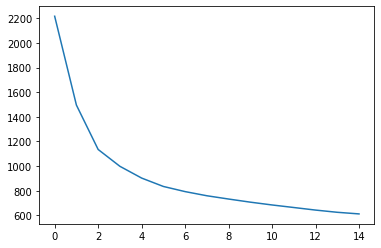

In [27]:
# Test optimal number of cluster with elbow method

costs = []

for num_clusters in list(range(1,16)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    clusters = kproto.fit_predict(alc_edu_freq_red_ages, categorical=[0,1,2,3])
    costs.append(kproto.cost_)

plt.plot(costs)

In [28]:
print(costs)
cost_elbow = KneeLocator(x=range(1,16), y=costs, curve='convex', direction='decreasing')
print(cost_elbow.elbow)

[2217.000000000002, 1495.6910994435361, 1135.2050040806462, 998.5567417543898, 903.0023340487188, 834.8938671864504, 793.0665281622888, 759.4090956865429, 732.7422941630075, 707.368923071813, 684.602348771964, 663.9056497628601, 643.0464711091724, 625.093534019664, 611.9162744347816]
4


In [ ]:
cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

alc_edu_freq_red_clusters = alc_edu_freq_red_data.copy()
alc_edu_freq_red_clusters['clusters'] = cluster_dict